<h1 id="1" style ="color:salmon;">Problem Objective</h1>


>Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

<details>
  <summary>Column Descriptions</summary>

- <span style="color:red">Class: Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira).</span>
- Area: The area of a bean zone and the number of pixels within its boundaries.
- Perimeter: Bean circumference is defined as the length of its border.
- MajorAxisLength: The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRation: Defines the relationship between L and l.
- Eccentricity: Eccentricity of the ellipse having the same moments as the region.
- ConvexArea: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter: The diameter of a circle having the same area as a bean seed area.
- Extent: The ratio of the pixels in the bounding box to the bean area.
- Solidity: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- roundness: Calculated with the following formula: (4piA)/(P^2)
- Compactness: Measures the roundness of an object: Ed/L
- ShapeFactor1: 
- ShapeFactor2: 
- ShapeFactor3: 
- ShapeFactor4: 
</details>


<h1 id="2" style ="color:salmon;">Exploratory Data Analysis (EDA)</h1>

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import label_binarize

<h2 id="2.1">Information about DataFrame</h2>


In [138]:
dry = pd.read_csv("Dry_Bean_Dataset.csv")
print(f"shape of the dataset {dry.shape}")

shape of the dataset (13611, 17)


In [139]:
dry.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [140]:
dry.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [141]:
dry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [142]:
dry.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [143]:
dry.describe(include="O")


,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [144]:
dry['Class'].value_counts().sort_values(ascending=False)
dry['Class']

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

Text(0.5, 1.0, 'Bar Chart of Class Distribution')

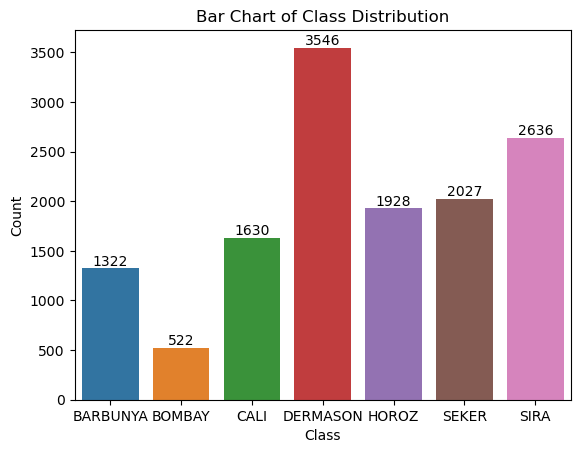

In [145]:
ax = sns.barplot(x='Class', y='Count', data=dry.groupby('Class').size().reset_index(name='Count'))
ax.bar_label(ax.containers[0])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart of Class Distribution')

<h2 id="2.2">Detecting missing data</h2>

In [146]:
# detect number of NaN value in each column.
dry.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<h2 id="2.3">Drop duplicates data</h2>

In [147]:
dry = dry.drop_duplicates()
print(f"the shape after drop duplicates is: {dry.shape}")

the shape after drop duplicates is: (13543, 17)


<h2 id="2.3">Detecting outliers</h2>

this plot show the outoutliers in each column


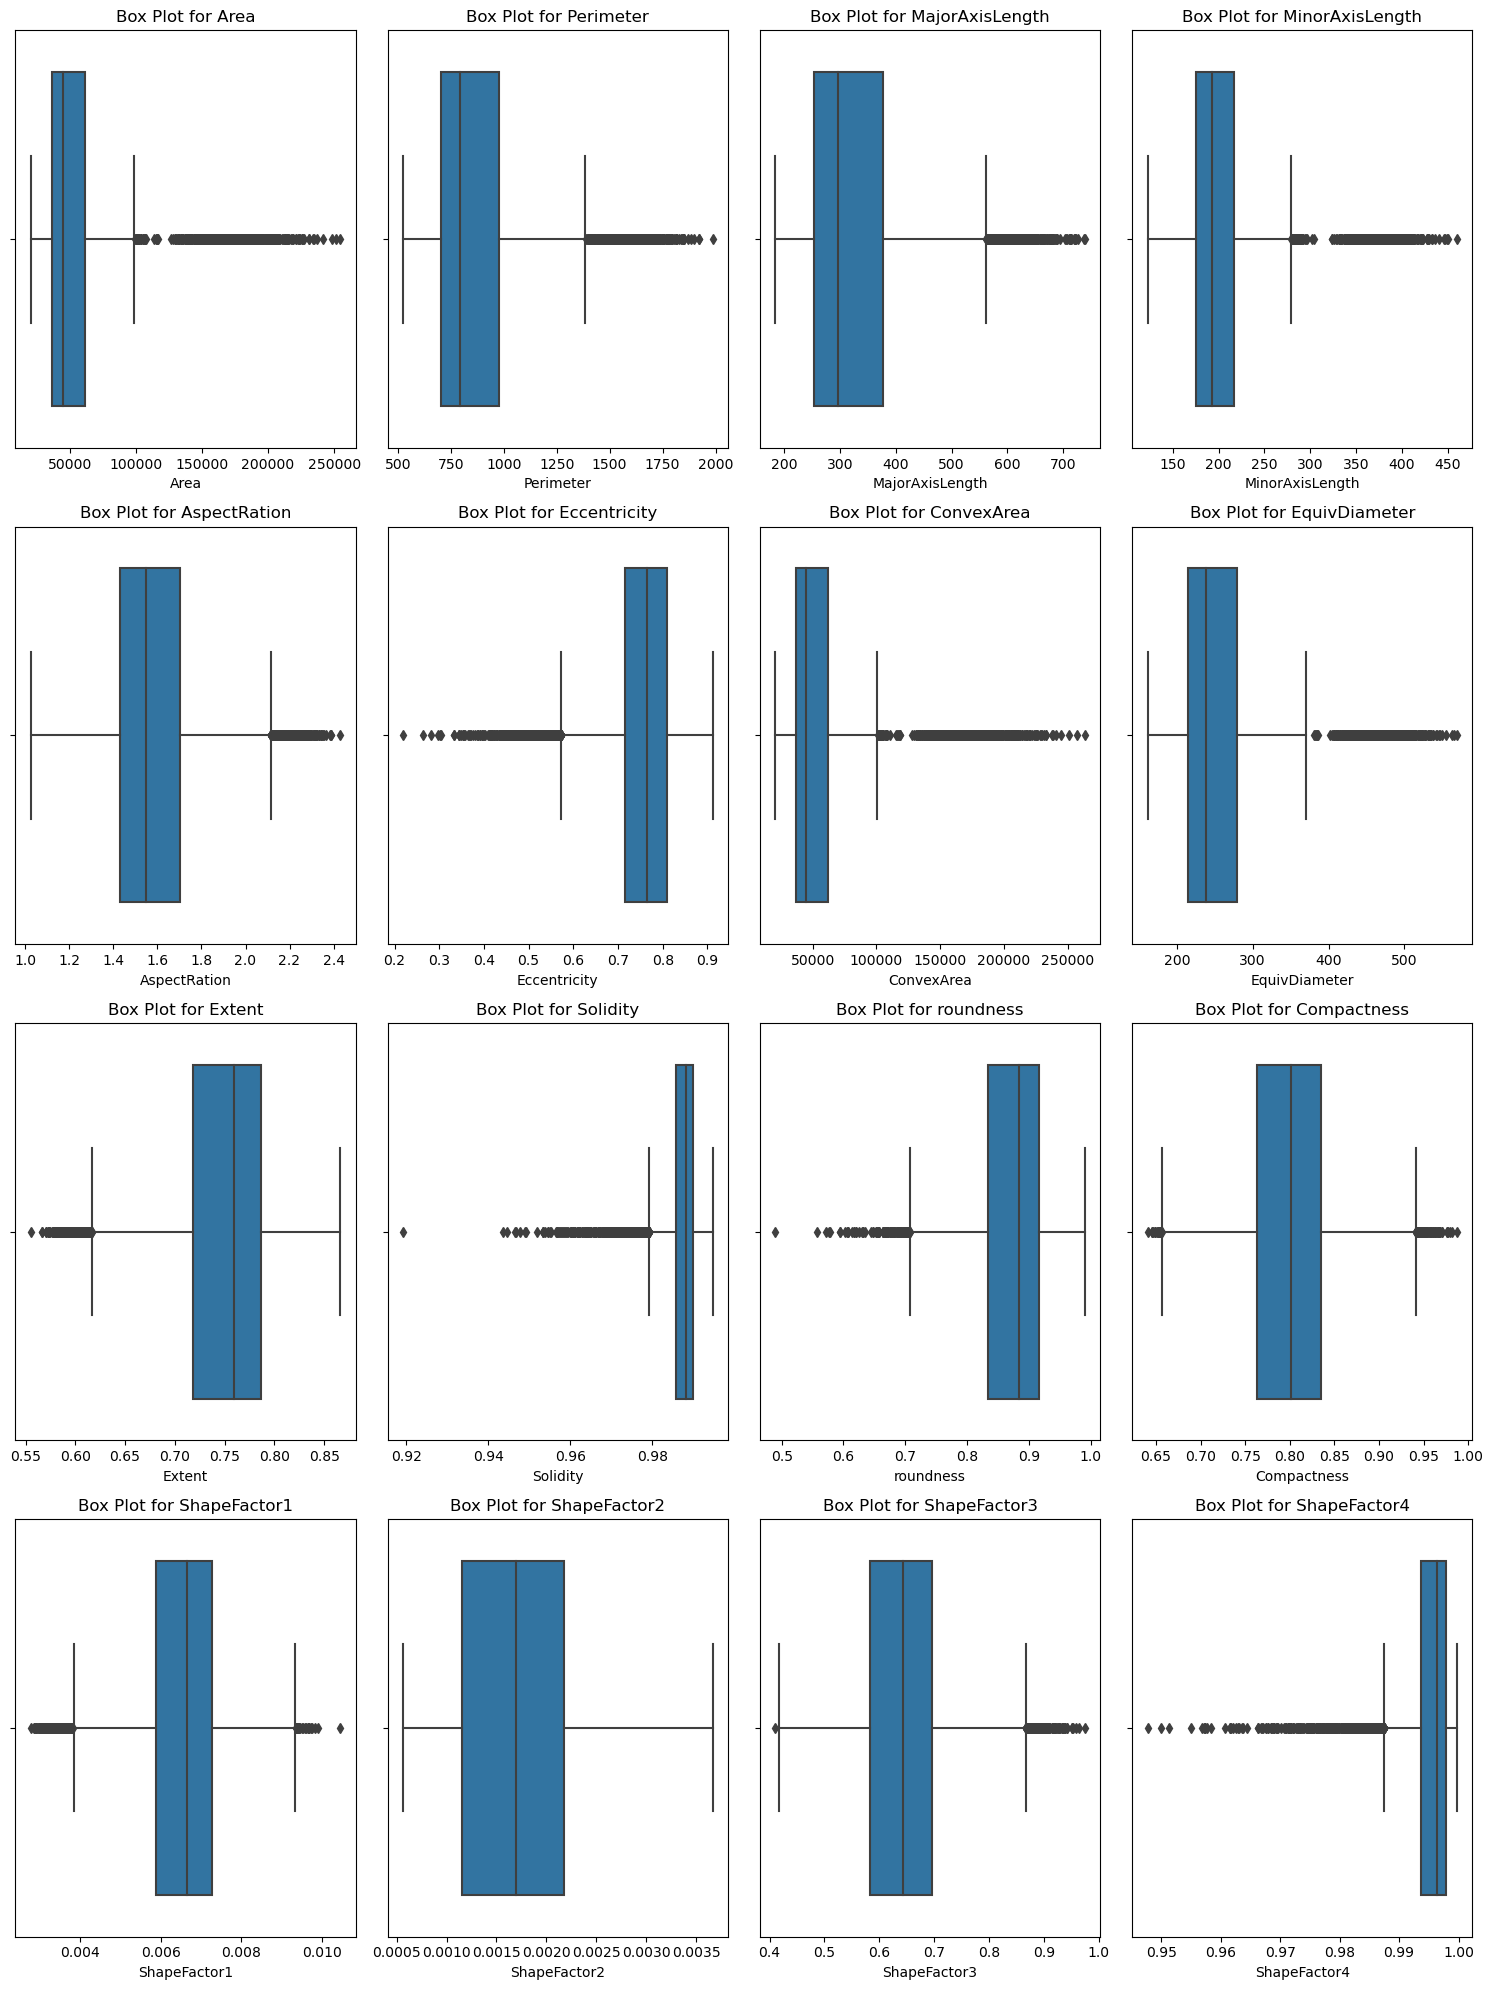

In [148]:
print("this plot show the outoutliers in each column")

# Select only numerical features
numerical_features = dry.select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 4  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access  
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=dry[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (4*4 = 16 but we have only 17 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()
#Data before handle outlier


<h2 id="3.3">Dealing with outliers</h2>

In [149]:
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower 
    # np.where(condition, if True excute this, NO excute this)
    # dataframe[column] = np.where((dataframe[column] < lower) | (dataframe[column] > upper), dataframe[column].median(), dataframe[column])
    return dataframe

for col in dry.select_dtypes(include=["number"]).columns :
    houses = handle_outliers_iqr(dry, col)

this plot show the outoutliers in each column


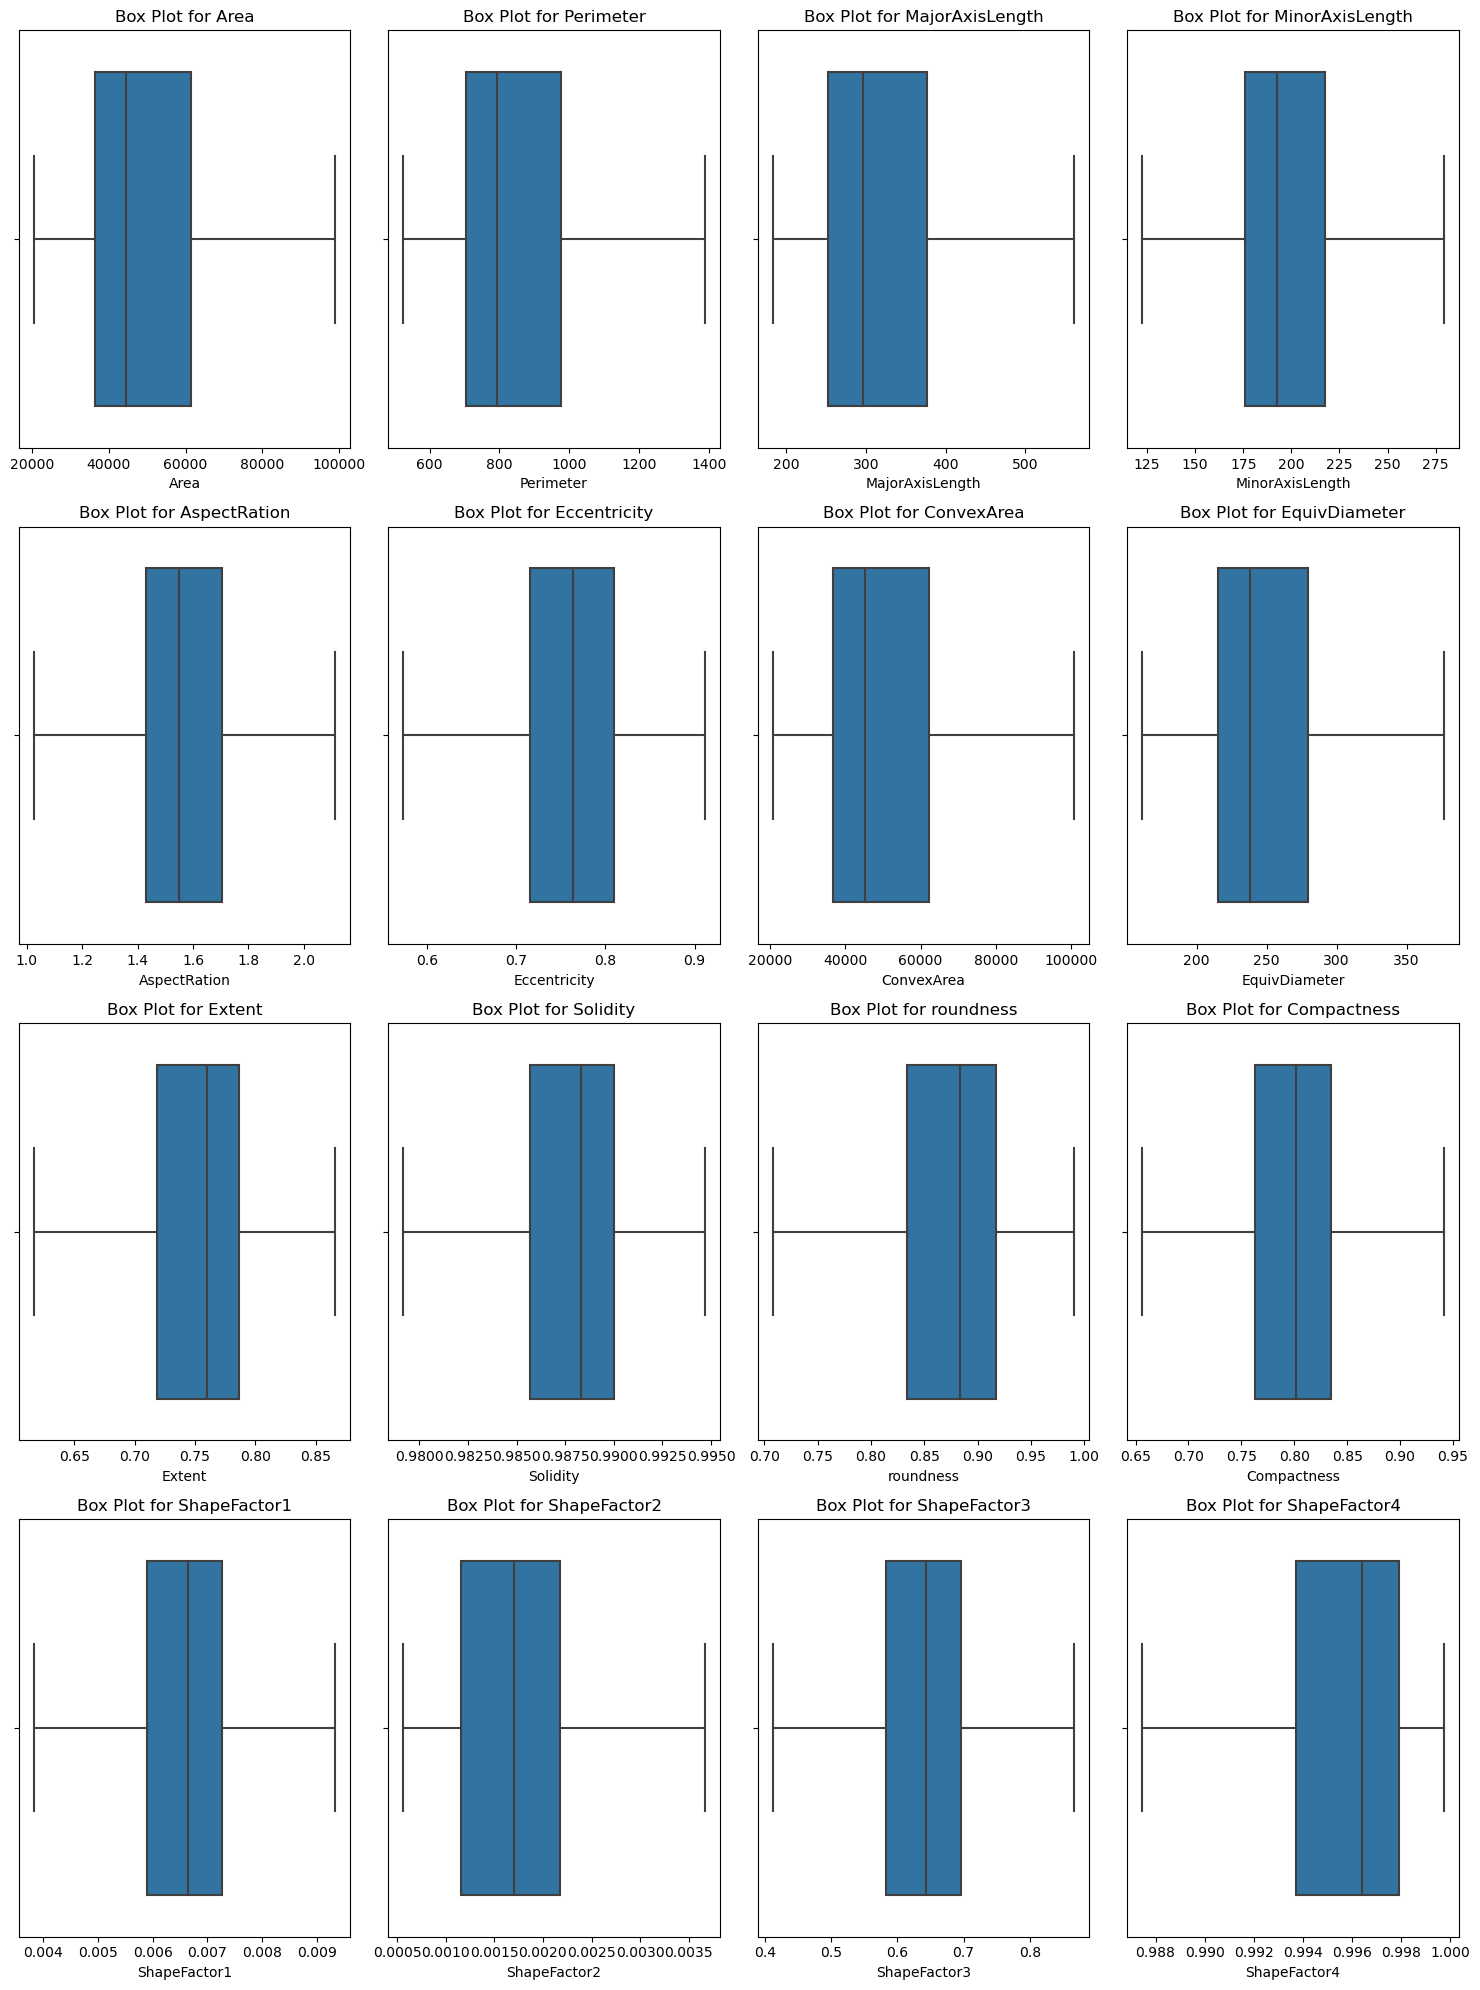

In [150]:
print("this plot show the outoutliers in each column")

# Select only numerical features
numerical_features = dry.select_dtypes(include=['number'])

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 4  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access  
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=dry[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (4*4 = 16 but we have only 17 features to plot)
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [151]:
# using labelEncoder to convert objects

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# dry["Class"] = encoder.fit_transform(dry["Class"])

print(dry["Class"].unique())
# convert object classes to numircal value
dry.replace({"Class":{"SEKER":0, "BARBUNYA":1, "BOMBAY":2, "CALI":3, "HOROZ":4, "SIRA":5, "DERMASON":6}}, inplace=True)
newClasses = dry["Class"].unique()
print(f"After convert object to numircal: {newClasses} ")


['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
After convert object to numircal: [0 1 2 3 4 5 6] 


<h2 id="2.4">Correlation analysis</h2>

In [152]:
dry.select_dtypes(include=['number']).columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

<Axes: >

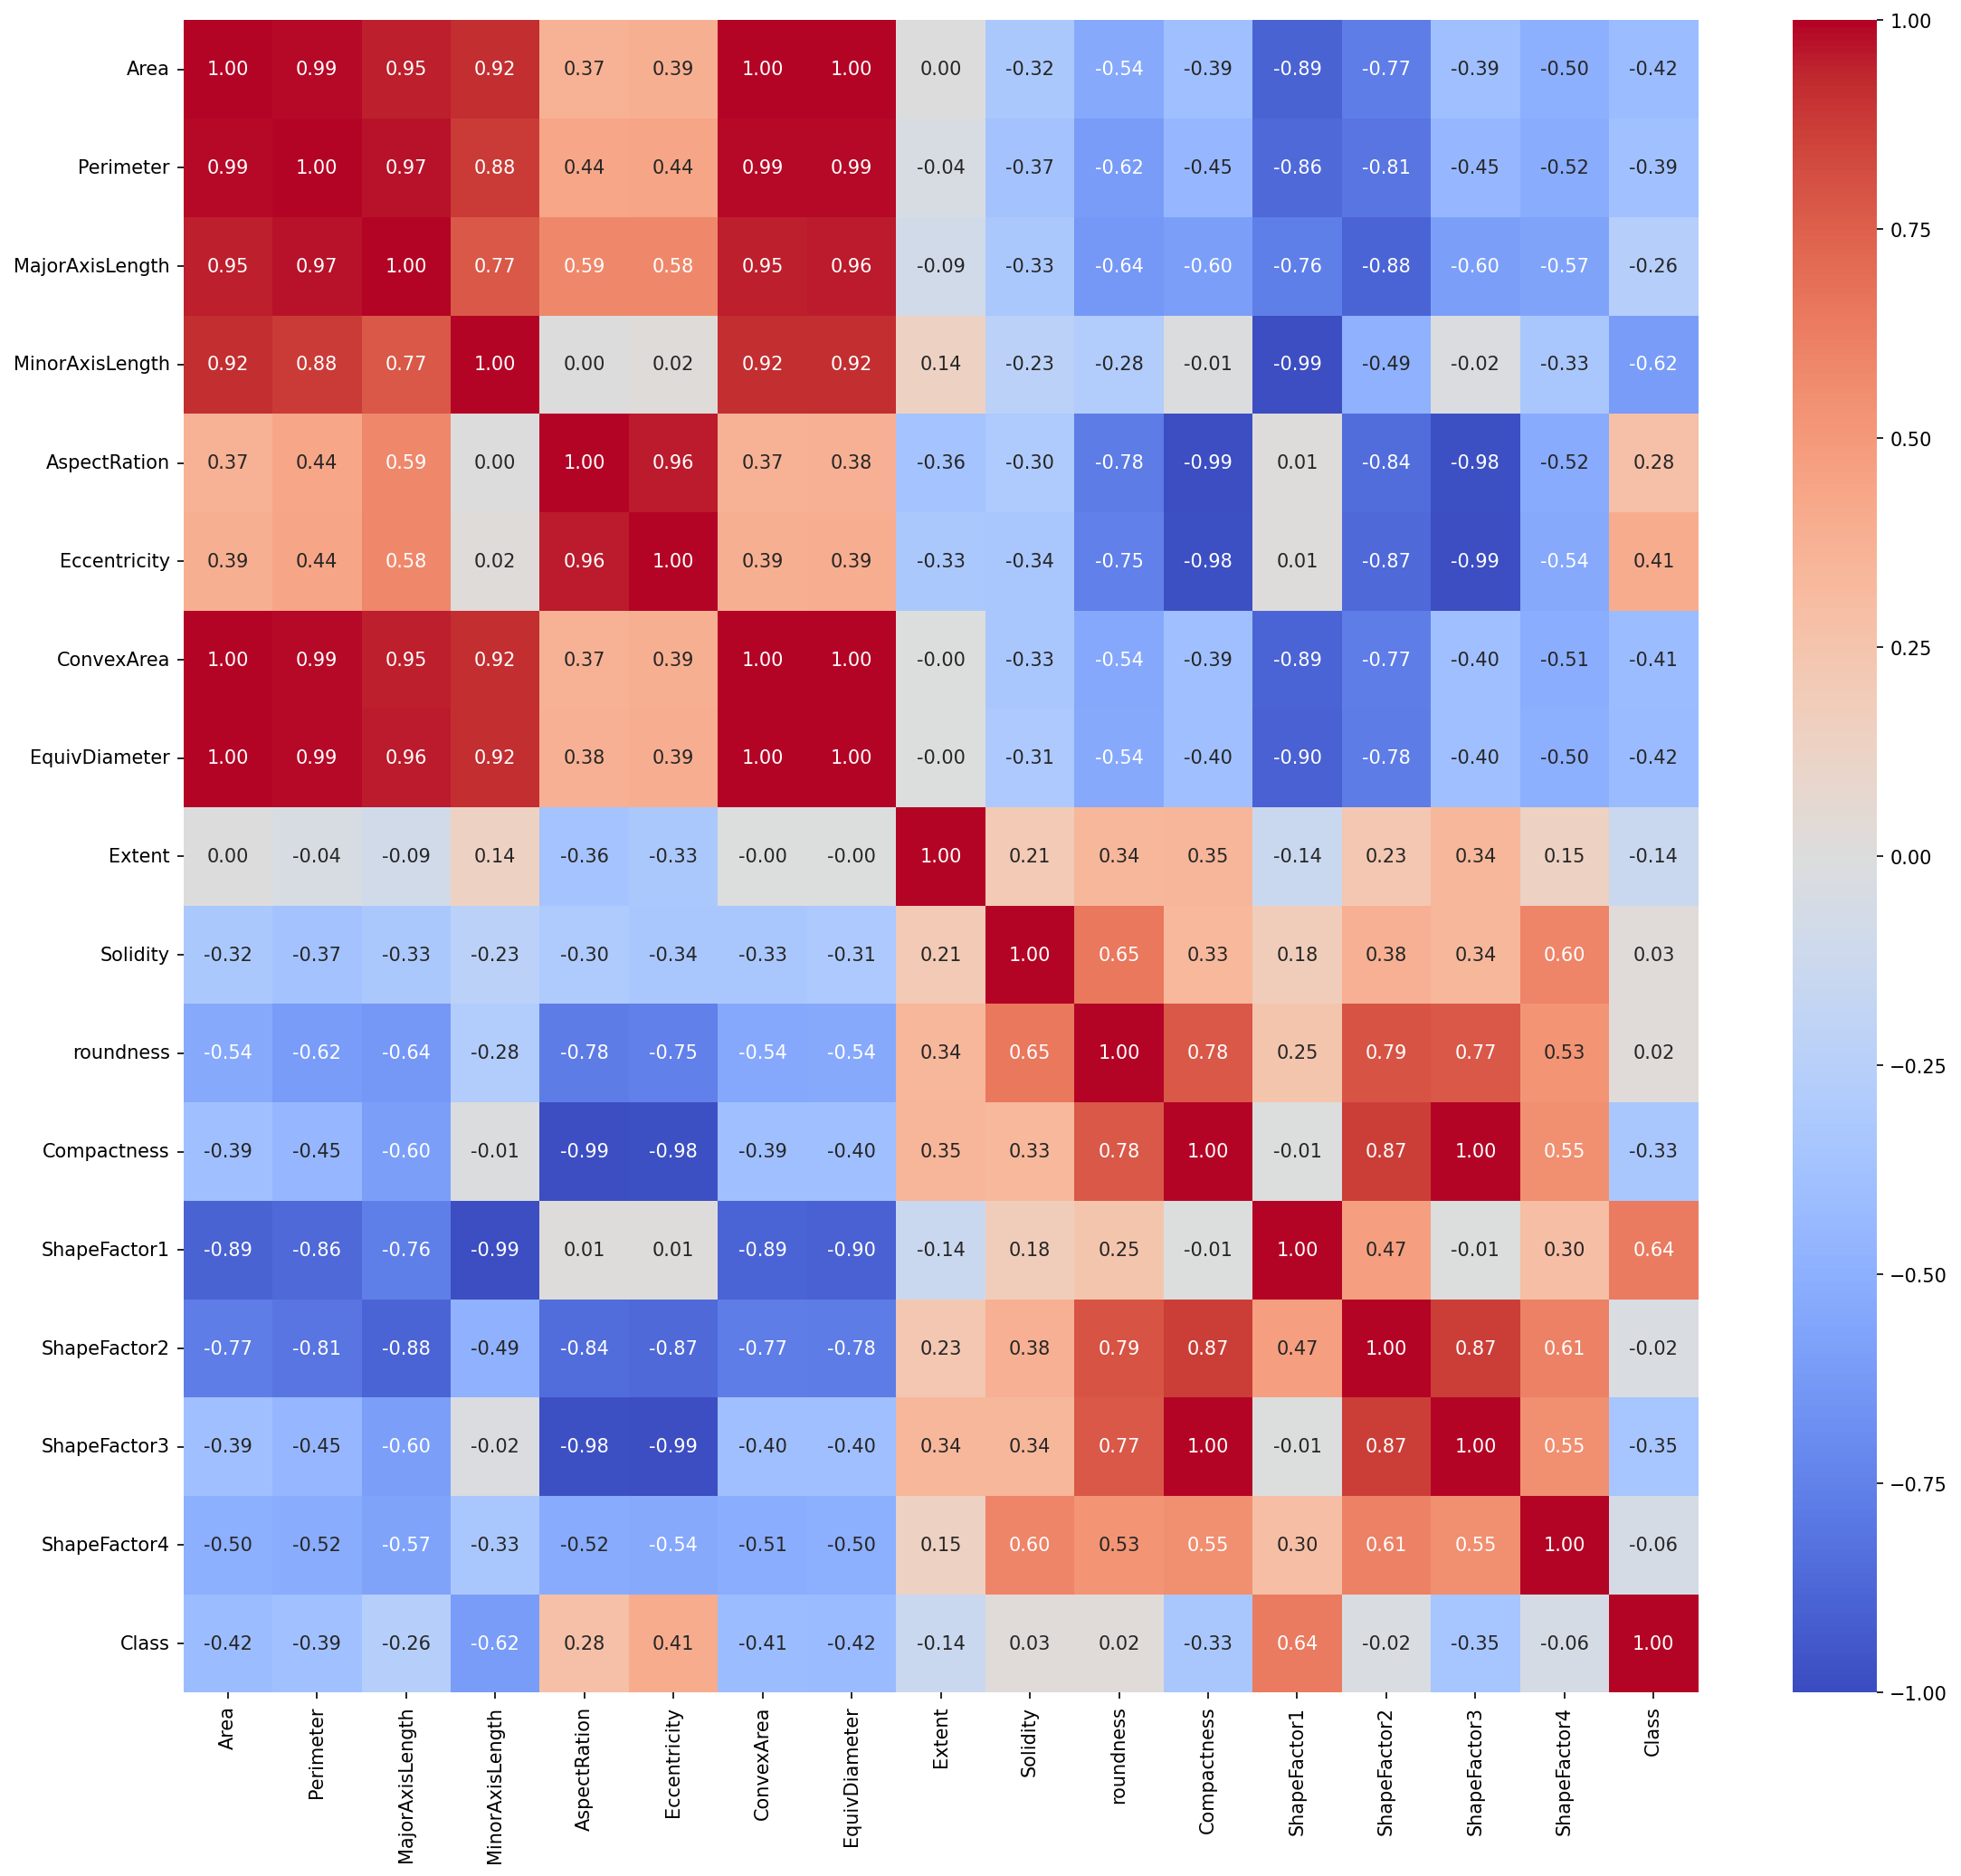

In [153]:
# correlation matrix 
corr = dry.corr(numeric_only=True)

# figure settings
plt.figure(figsize=(18,16), dpi=150)

# corr matrix "heatmap"
# sns.heatmap(corr, cmap="Blues")
sns.heatmap(corr, fmt='.2f', annot=True, vmin=-1,center=0, vmax=1, cmap='coolwarm')

In [154]:
correlation = corr["Class"].apply(abs).sort_values(ascending=False).reset_index()
print(correlation.shape)
correlation

(17, 2)


,index,Class
0,Class,1.000000
1,ShapeFactor1,0.635678
2,MinorAxisLength,0.616003
3,EquivDiameter,0.424908
4,Area,0.415520
5,ConvexArea,0.414518
6,Eccentricity,0.405098
7,Perimeter,0.388692
8,ShapeFactor3,0.350461
9,Compactness,0.331117


In [155]:
# dry.drop(columns=correlation["index"].values[13:], inplace=True)
# dry.shape

<h1 id="4" style ="color:salmon;">Model Building and Enhancing</h1>

In [156]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [157]:
# split data to features and target 
X = houses.iloc[:, :-1].values
y = houses.iloc[:, -1:].values

# split data to train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True,with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2 id="4.1"><span style="color:green">S</span>upport <span style="color:green">V</span>ector <span style="color:green">C</span>lassifier</h2>


In [159]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

svc = SVC(kernel="rbf", C=1)
svc.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores_svc = cross_val_score(svc, X_train, y_train, cv=cv)
print("Cross-validated scores:", scores_svc)
print(f"Mean Cross-validated-accuracy: {scores_svc.mean()}")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross-validated scores: [0.92962598 0.92470472 0.93648449 0.92762186 0.92220581]
Mean Cross-validated-accuracy: 0.9281285740316434


In [160]:
y_pred_svc = svc.predict(X_test)

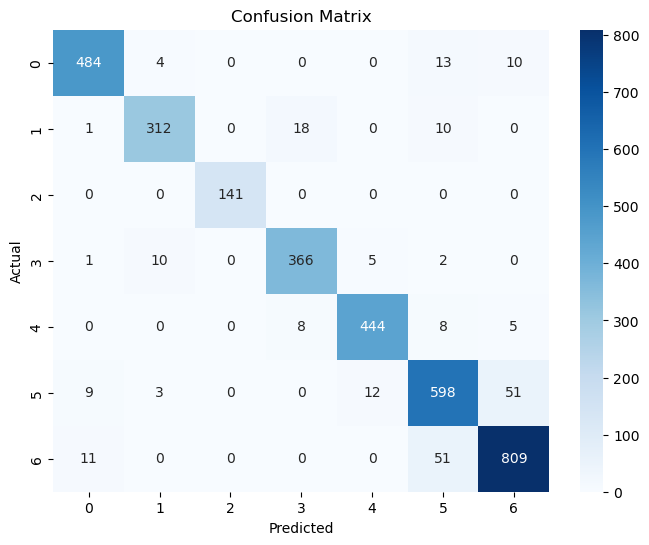

In [161]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [162]:
# score for train 
print(f"train score: {svc.score(X_train, y_train)}")
# score for test 
print(f"test score: {svc.score(X_test, y_test)}")

train score: 0.9318696465491779
test score: 0.9314825753101004


In [163]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)

Decision Tree Classifier Accuracy: 0.8821618428824571
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       511
           1       0.92      0.77      0.84       341
           2       1.00      1.00      1.00       141
           3       0.80      0.92      0.86       384
           4       0.95      0.94      0.94       465
           5       0.81      0.85      0.83       673
           6       0.87      0.91      0.89       871

    accuracy                           0.88      3386
   macro avg       0.90      0.89      0.89      3386
weighted avg       0.89      0.88      0.88      3386



<h1 id="4" style ="color:blue;">DecisionTree</h1>

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
# Create a decision tree classifier with customized hyperparameters
tree_clf = DecisionTreeClassifier(
    max_depth=550,  # Maximum depth of the tree
    min_samples_split=350,  # Minimum number of samples required to split an internal node
    min_samples_leaf=150,  # Minimum number of samples required to be a leaf node
    random_state=42  # Random state for reproducibility
)
# Train the classifier on the training data
tree_clf.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores_tree = cross_val_score(tree_clf, X_train, y_train, cv=cv)
print("Cross-validated scores:", scores_tree)
print(f"Mean Cross-validated-accuracy: {scores_tree.mean()}")


Cross-validated scores: [0.86860236 0.87598425 0.89561792 0.88035451 0.88380108]
Mean Cross-validated-accuracy: 0.8808720249518294


In [166]:
# Predict the classes for the testing data
y_pred_tree = tree_clf.predict(X_test)

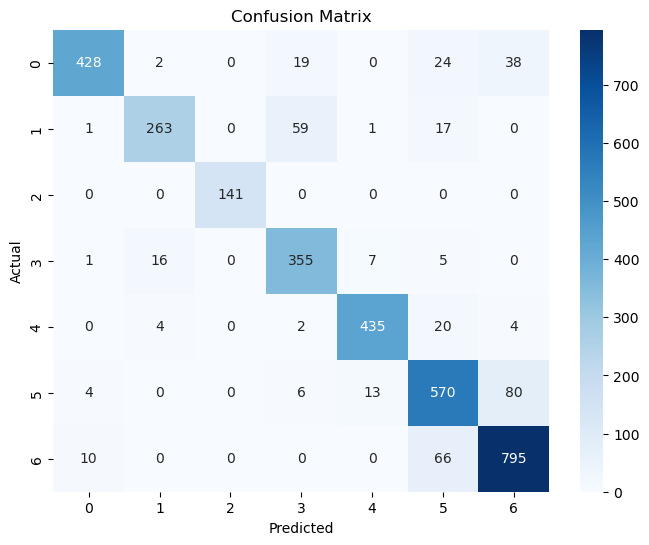

In [167]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

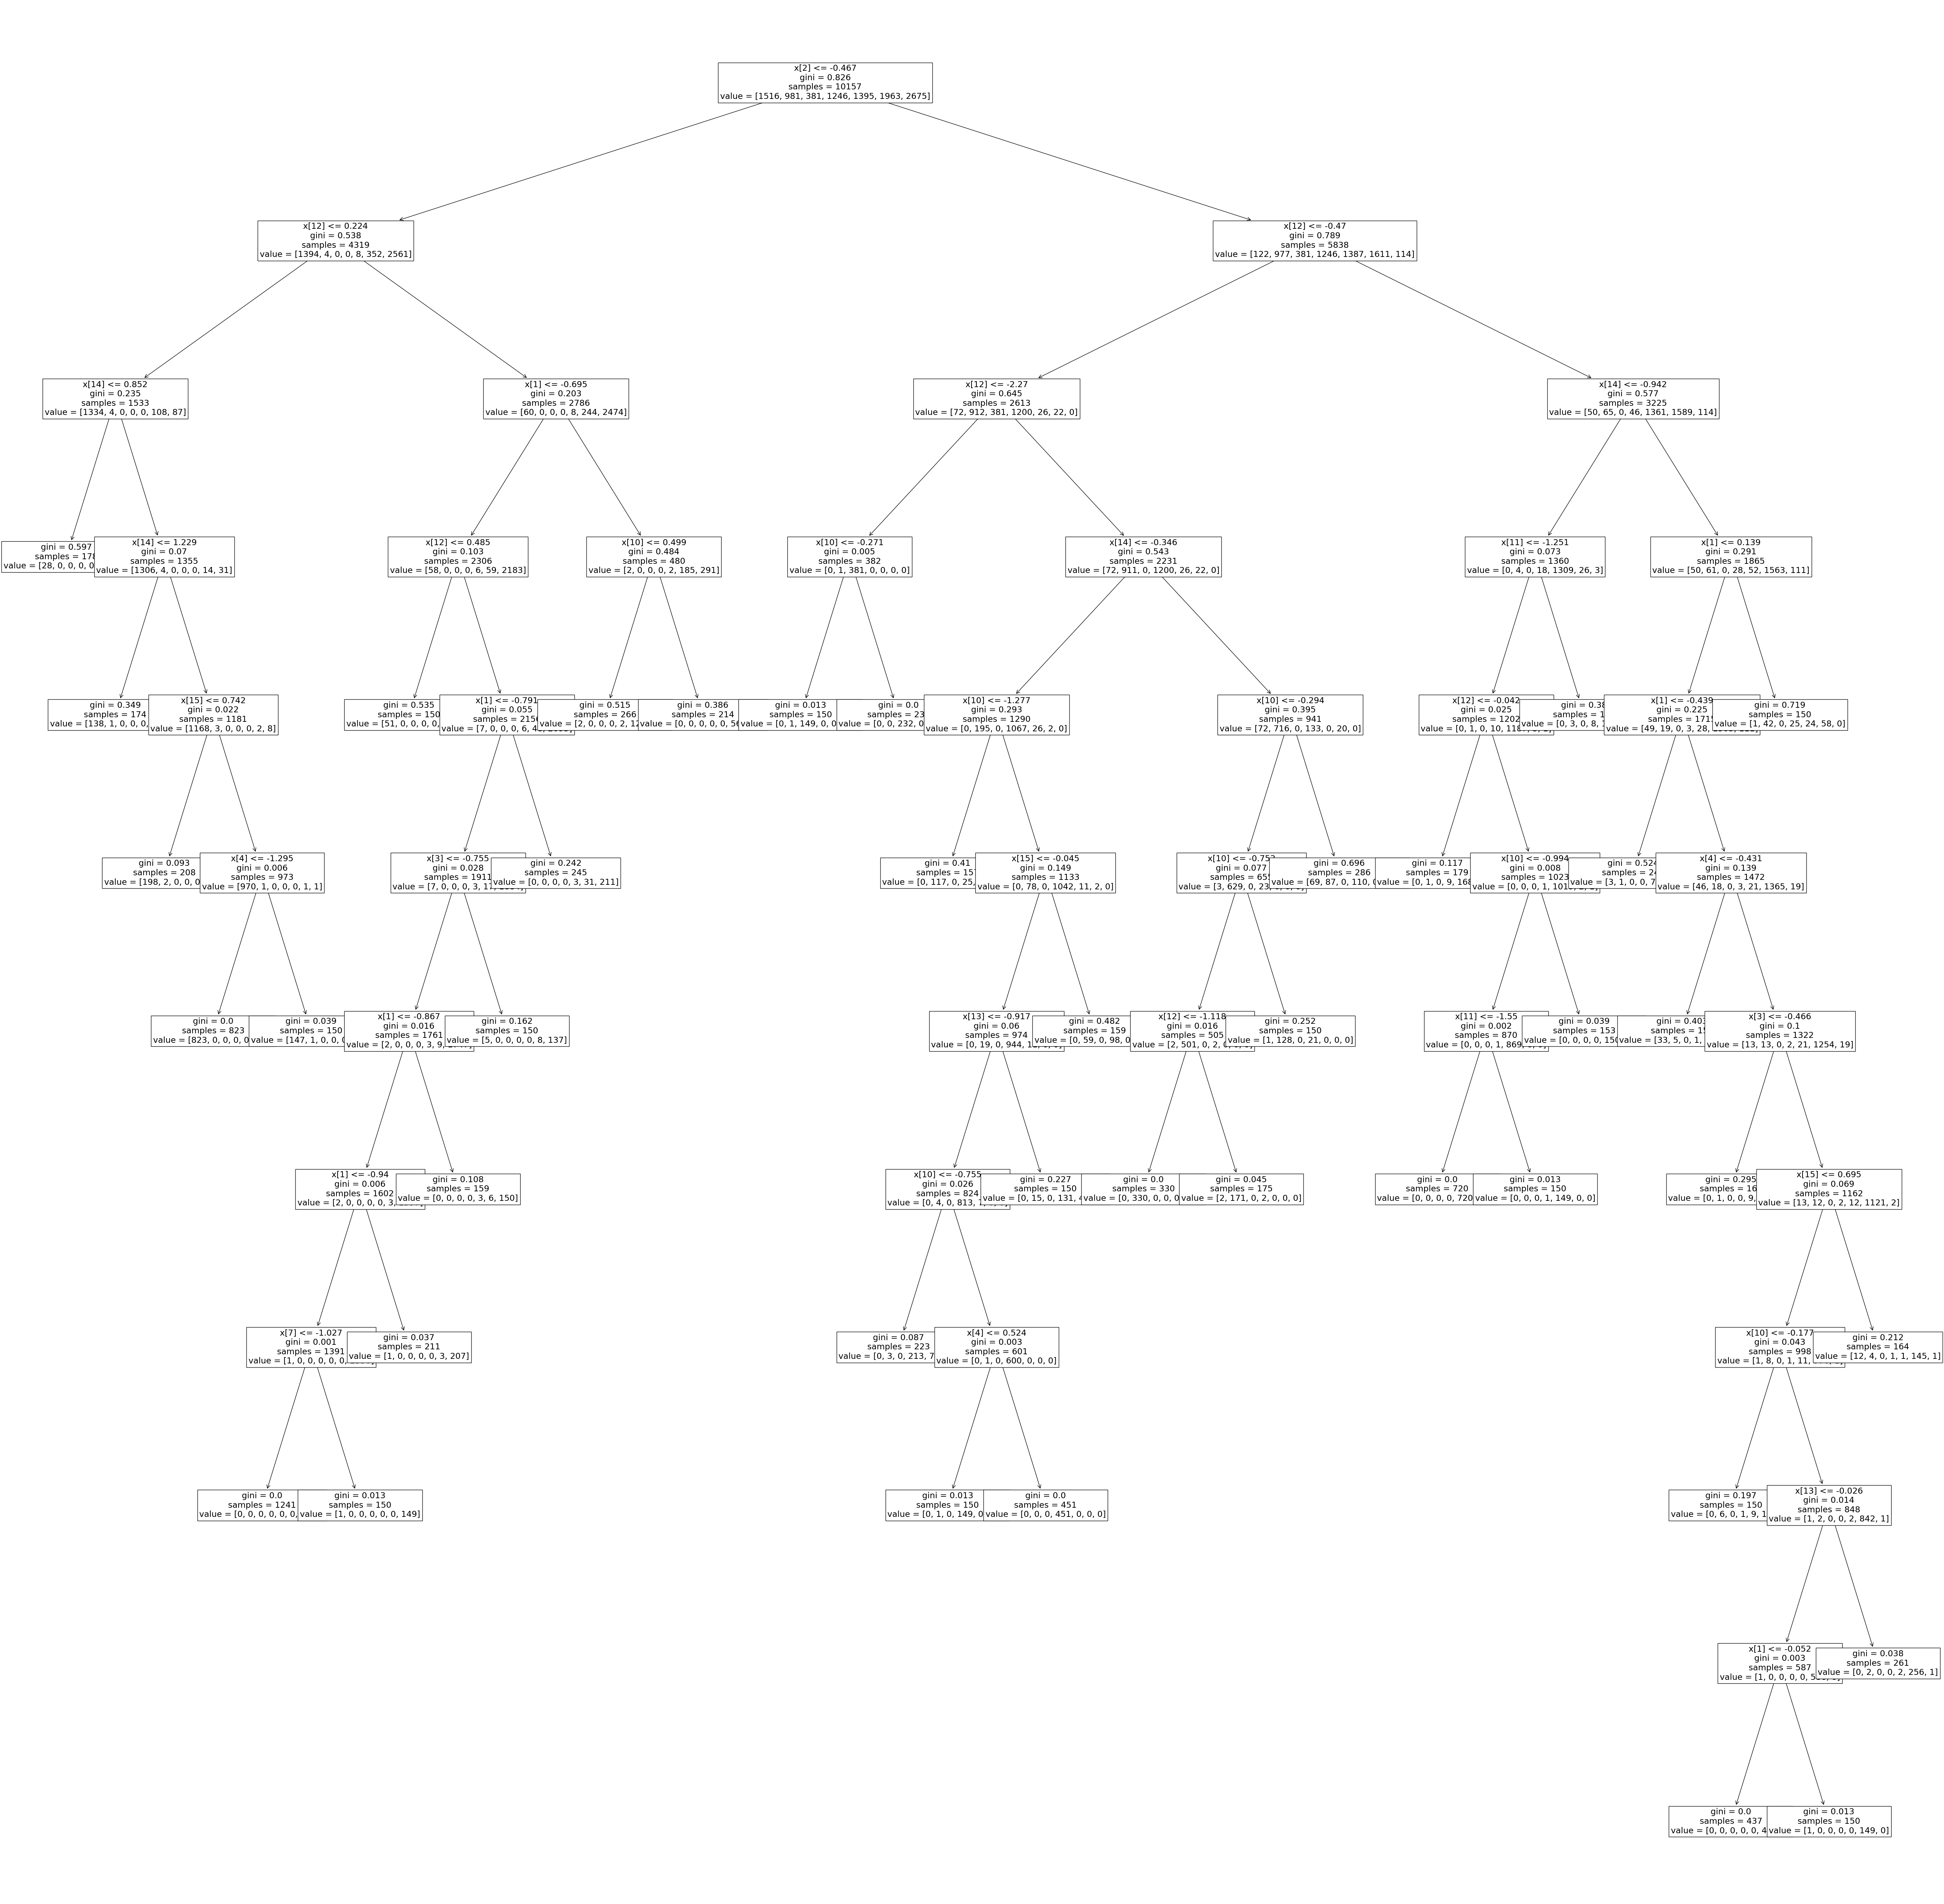

In [168]:
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure , show


figure(figsize=(70 , 70))
tree.plot_tree(tree_clf,fontsize=17)
show()
# # Convert feature names to strings
# feature_names_str = X.columns.astype(str)

# # Create a figure and axis to plot the tree
# plt.figure(figsize=(50, 30))  # Adjust figure size as needed
# plot_tree(tree_clf, 
#           filled=True, 
#           rounded=True, 
#           feature_names=feature_names_str,  # Use converted feature names
#           class_names=tree_clf.classes_.astype(str)
#           ,fontsize=12)  # Convert class names to strings
# plt.show()




In [169]:
# score for train 
print(f"train score: {tree_clf.score(X_train, y_train)}")
# score for test 
print(f"test score: {tree_clf.score(X_test, y_test)}")

train score: 0.8885497686324703
test score: 0.8821618428824571


In [170]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy:", accuracy)
print("Classification Report:\n", report)

Decision Tree Classifier Accuracy: 0.8821618428824571
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       511
           1       0.92      0.77      0.84       341
           2       1.00      1.00      1.00       141
           3       0.80      0.92      0.86       384
           4       0.95      0.94      0.94       465
           5       0.81      0.85      0.83       673
           6       0.87      0.91      0.89       871

    accuracy                           0.88      3386
   macro avg       0.90      0.89      0.89      3386
weighted avg       0.89      0.88      0.88      3386



 <h1 color="red">ANN</h1>

In [171]:
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)


In [172]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(110, activation='relu'),
    keras.layers.Dense(110, activation='relu'),
    keras.layers.Dense(7, activation='softmax')#  # Number of unique classes
])


C:\Users\Yussef\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [173]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' since your target is not one-hot encoded
              metrics=['accuracy'])

In [174]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Evaluate the model
print('test Loss:',test_loss)
print('test Accuracy:',test_accuracy)


Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8056 - loss: 0.6450 - val_accuracy: 0.9164 - val_loss: 0.2414
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9236 - loss: 0.2123 - val_accuracy: 0.9206 - val_loss: 0.2296
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9266 - loss: 0.2004 - val_accuracy: 0.9220 - val_loss: 0.2249
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9274 - loss: 0.1937 - val_accuracy: 0.9217 - val_loss: 0.2227
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9286 - loss: 0.1894 - val_accuracy: 0.9223 - val_loss: 0.2194
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9282 - loss: 0.1865 - val_accuracy: 0.9226 - val_loss: 0.2174
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9304 - loss: 0.1832 - val_accuracy: 0.9220 - val_loss: 0.2169
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9316 - loss: 0.1809 - val_accuracy: 0.

Visualization

<Figure size 2000x800 with 0 Axes>

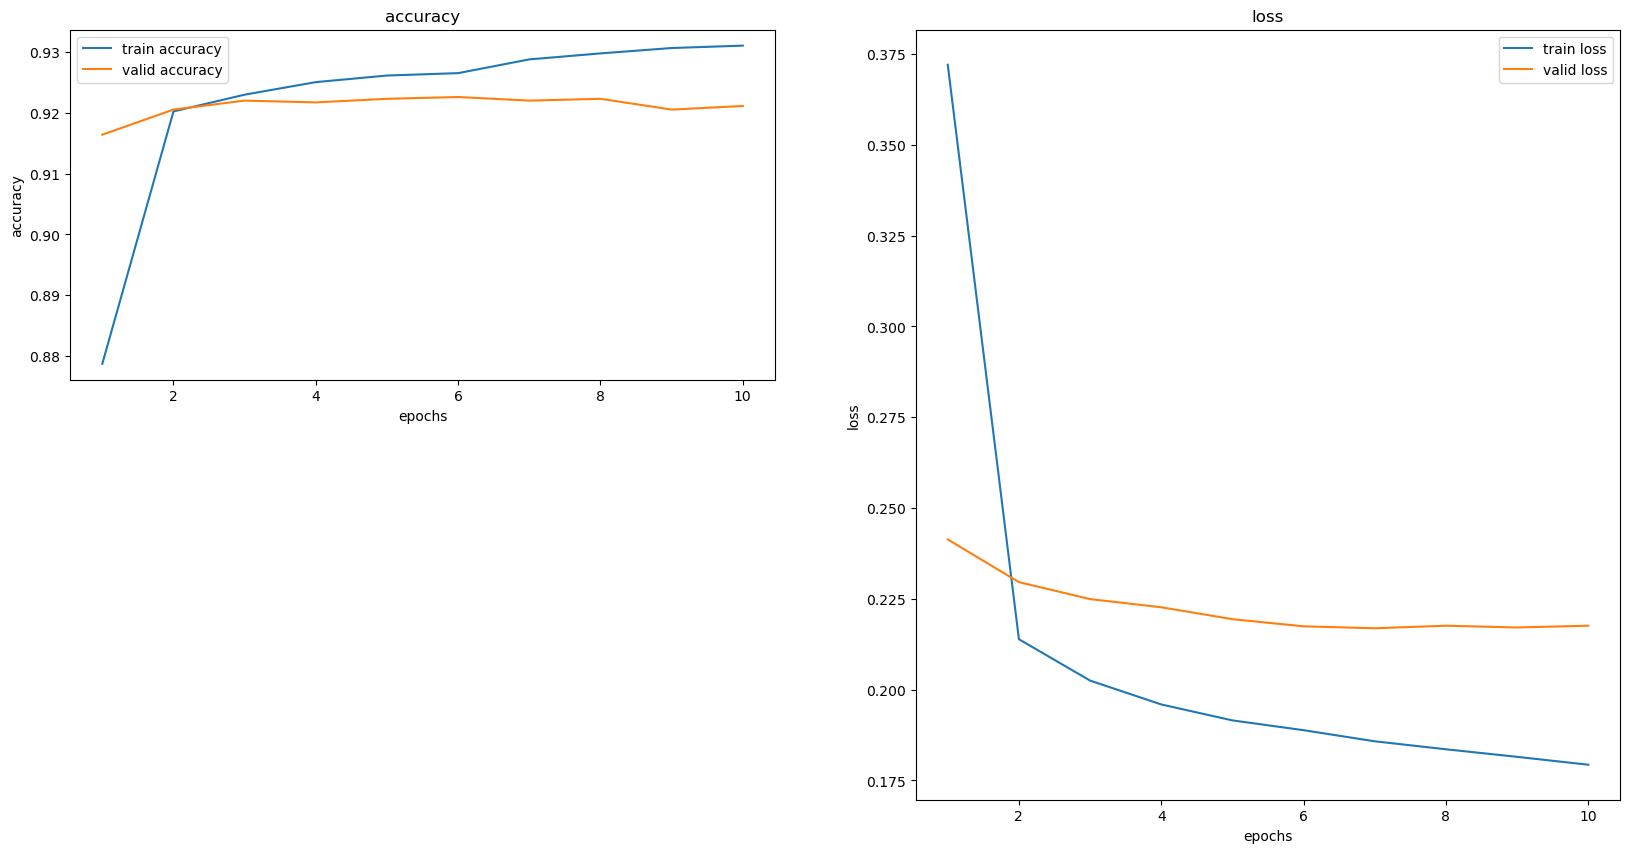

In [175]:
plt.figure(figsize=(20, 8))
tr_loss=history.history["loss"]
val_loss=history.history["val_loss"]

tr_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

epochs=[i+1 for i in range (len(tr_accuracy))]

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.plot(epochs,tr_loss,label="train loss")
plt.plot(epochs,val_loss,label="valid loss")
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(2, 2, 1)
plt.plot(epochs,tr_accuracy,label="train accuracy")
plt.plot(epochs,val_accuracy,label="valid accuracy")
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()